In [50]:
import json
import matplotlib.pyplot as plt
import numpy as np

# loss vs. iter visualization

In [76]:
def get_loss(filename):
    file = open(filename, 'r')
    loss = []
    loss_bbox = []
    for line in file: 
        if "loss" in line and "json_stats" in line:
            line = line.replace("json_stats: ", "")
            obj = json.loads(line)
            ls = obj['loss'] 
            ls_bx = obj['loss_bbox']
            loss.append(ls)
            loss_bbox.append(ls_bx)
    return loss, loss_bbox

In [61]:
loss_50, loss_bbox_50 = get_loss('R-50-out.txt')
loss_0531, loss_bbox_0531 = get_loss('overnight-May-31-2018.txt')
print(len(loss_50),len(loss_0531))

1151 2302


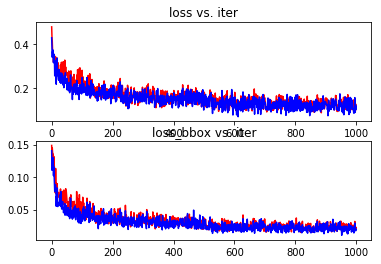

In [65]:
n = 1000
x = range(n)
plt.subplot(211)
plt.plot(x, loss_50[5:n+5], 'r-', x, loss_0531[5:n+5], 'b-')
plt.title("loss vs. iter")

plt.subplot(212)
plt.plot(x, loss_bbox_50[5:n+5], 'r-', x, loss_bbox_0531[5:n+5], 'b-')
plt.title("loss_bbox vs. iter")
plt.show()

# accuracy vs. iter visualization

In [27]:
def get_acc(filename):
    file = open(filename, 'r')
    acc = []
    for line in file: 
        if "accuracy_cls" in line and "json_stats" in line:
            line = line.replace("json_stats: ", "")
            obj = json.loads(line)
            ac = obj['accuracy_cls'] 
            acc.append(ac)
    return acc

In [31]:
acc_50 = get_acc('R-50-out.txt')
acc_0531 = get_acc('overnight-May-31-2018.txt')
# print(acc_50)

/Users/xiaoyan/anaconda3/lib/python3.6/site-packages/numpy/core/function_base.py:233: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)


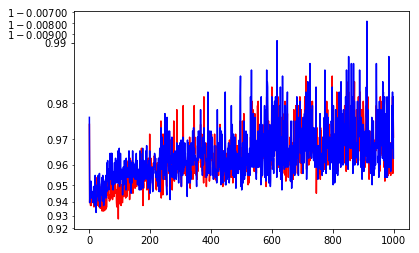

In [71]:
n = 1000
x = np.logspace(0,n, num=1000)
x = range(1000)
plt.plot(x, acc_50[:n], 'r-', x, acc_0531[:n], 'b-')
plt.yscale('logit')
plt.show()

# average precision visualization

In [90]:
def get_ap(filename):
    
    file = open(filename, 'r')
    aps_95_all = []
    aps_50_all = []
    aps_75_all = []
    aps_95_small = []
    aps_95_medium = []
    aps_95_large = []
    count = 0
    for line in file: 
        if "Average Precision" in line:
#             print(line)
            ap = float(line.split('=')[-1])
            if count%6 == 0:
                aps_95_all.append(ap)
            if count%6 == 1:
                aps_50_all.append(ap)
            if count%6 == 2:
                aps_75_all.append(ap)
            if count%6 == 3:
                aps_95_small.append(ap)
            if count%6 == 4:
                aps_95_medium.append(ap)
            if count%6 == 5:
                aps_95_large.append(ap)
            count+=1
            if (count >= 6):
                break
#     aps = [aps_95_all, aps_50_all, aps_75_all, aps_95_small, aps_95_medium, aps_95_large] 
    aps = aps_95_all + aps_50_all + aps_75_all  + aps_95_medium + aps_95_large
    return aps

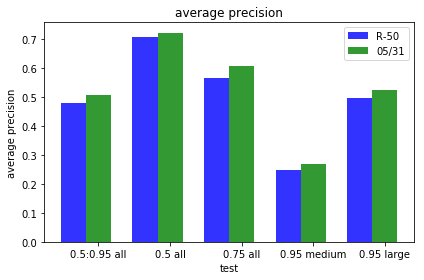

In [93]:
ap_50 = get_ap('R-50-out.txt')
ap_0531 = get_ap('overnight-May-31-2018.txt')
# print(ap_50,ap_0531)

# data to plot
n_groups = 5
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, ap_50, bar_width,
                 alpha=opacity,
                 color='b',
                 label='R-50')
 
rects2 = plt.bar(index + bar_width, ap_0531, bar_width,
                 alpha=opacity,
                 color='g',
                 label='05/31')
 
plt.xlabel('test')
plt.ylabel('average precision')
plt.title('average precision')
plt.xticks(index + bar_width, ('0.5:0.95 all', '0.5 all', '0.75 all', '0.95 medium', '0.95 large'))
plt.legend()
 
plt.tight_layout()
plt.show()
